In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
epa_results = pd.read_csv('full_epa_based_results.csv')
epa_results = epa_results[(epa_results['Key']!="log")&(epa_results['File']!="Sepsis")]
epa_results['Value'] = epa_results['Value'].astype(float)
epa_results['File'] = epa_results['File'].str.split('/').str[-1].str.split('.').str[0]
epa_results = epa_results.reset_index(drop=True)



In [22]:
epa_results

,File,Key,Value
0,BPIC15_1,epa_normalized_sequence_entropy,0.610294
1,BPIC15_1,epa_normalized_sequence_entropy_exponential_fo...,0.363928
2,BPIC15_1,epa_normalized_sequence_entropy_linear_forgetting,0.270241
3,BPIC15_1,epa_normalized_variant_entropy,0.652855
4,BPIC15_1,epa_sequence_entropy,346184.284991
...,...,...,...
147,Sepsis_Cases_Event_Log,epa_normalized_variant_entropy,0.652855
148,Sepsis_Cases_Event_Log,epa_sequence_entropy,346184.284991
149,Sepsis_Cases_Event_Log,epa_sequence_entropy_exponential_forgetting,206434.994626
150,Sepsis_Cases_Event_Log,epa_sequence_entropy_linear_forgetting,153292.220991


### Distribution of entropies

better looking plot

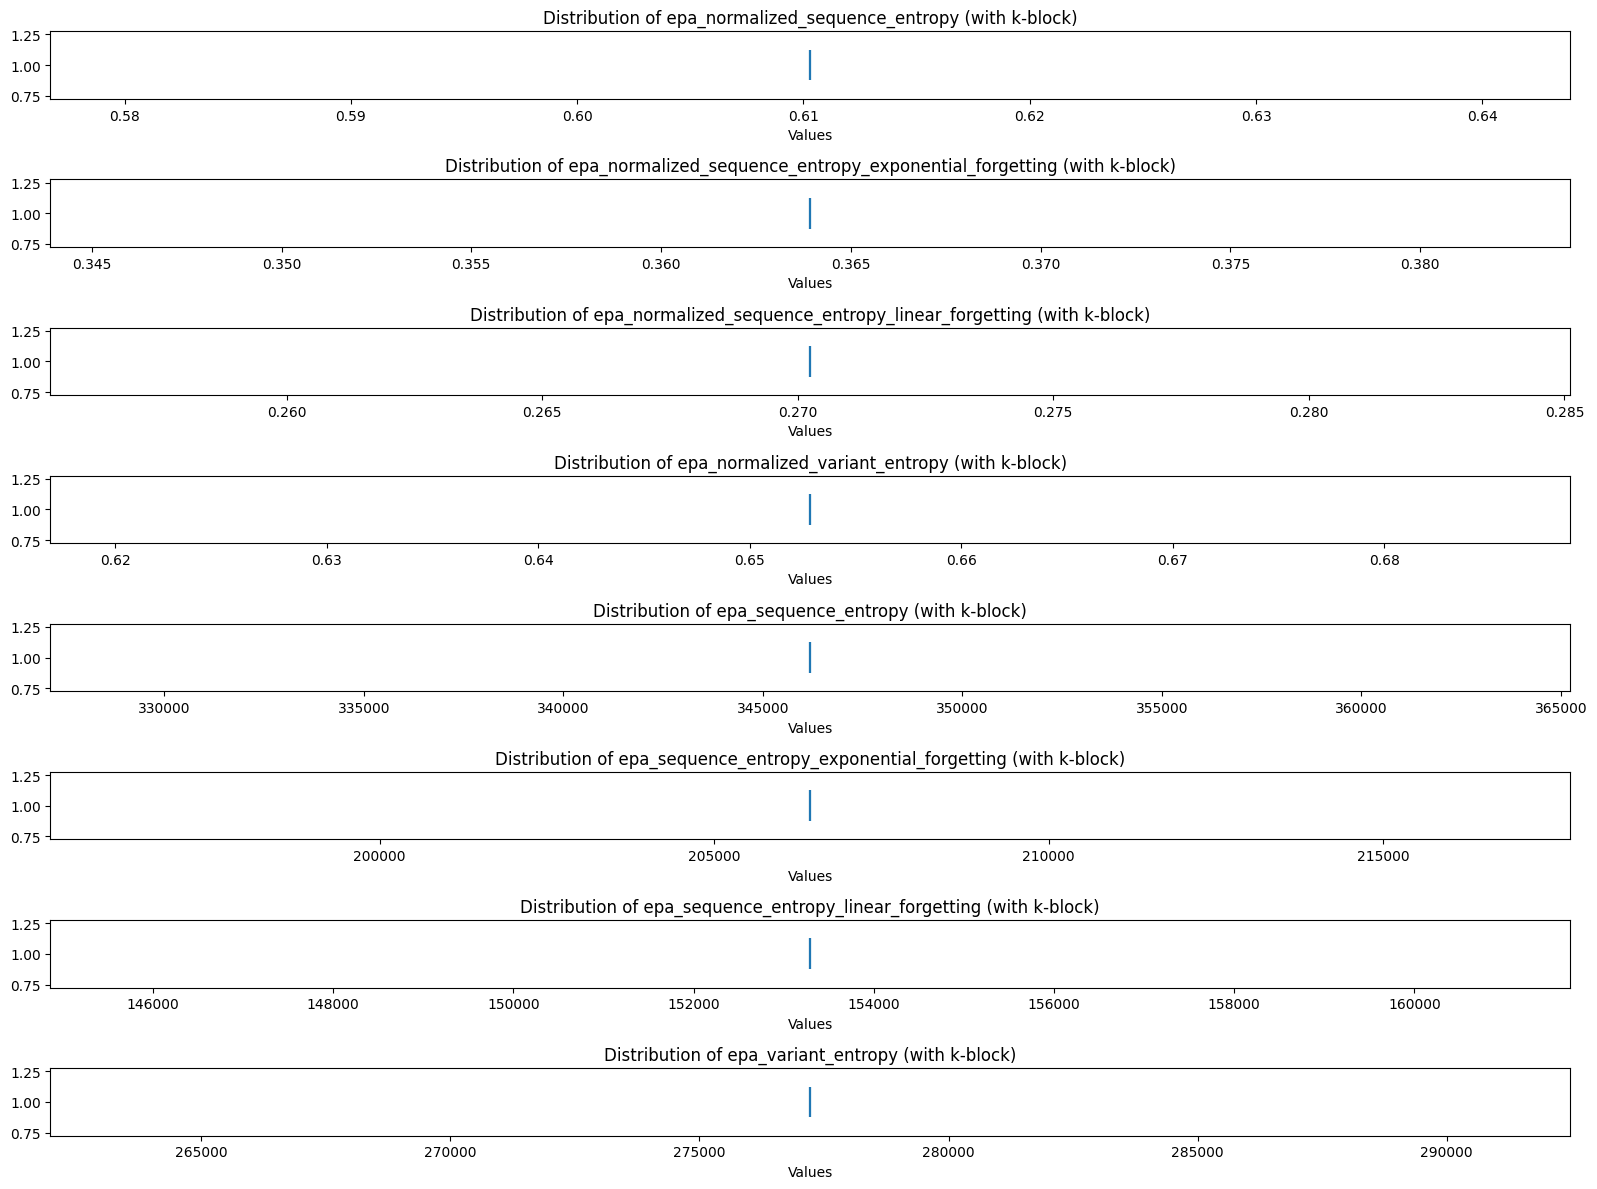

In [23]:
import matplotlib.pyplot as plt

# Your existing code...
unique_keys = epa_results['Key'].unique()
unique_keys = unique_keys[(unique_keys != 'n_traces') & (unique_keys != 'n_unique_traces')]

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=len(unique_keys), ncols=1, figsize=(16, 1.5 * len(unique_keys)),sharex=True)

# Iterate over unique keys
for i, key in enumerate(unique_keys):
    # Plot each category's distribution on its own subplot for entropy results
    axes[i].violinplot(epa_results[epa_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i].set_title("Distribution of " + key + " (with k-block)")
    axes[i].set_xlabel('Values')  # Set x-label for the first subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


better informing plot

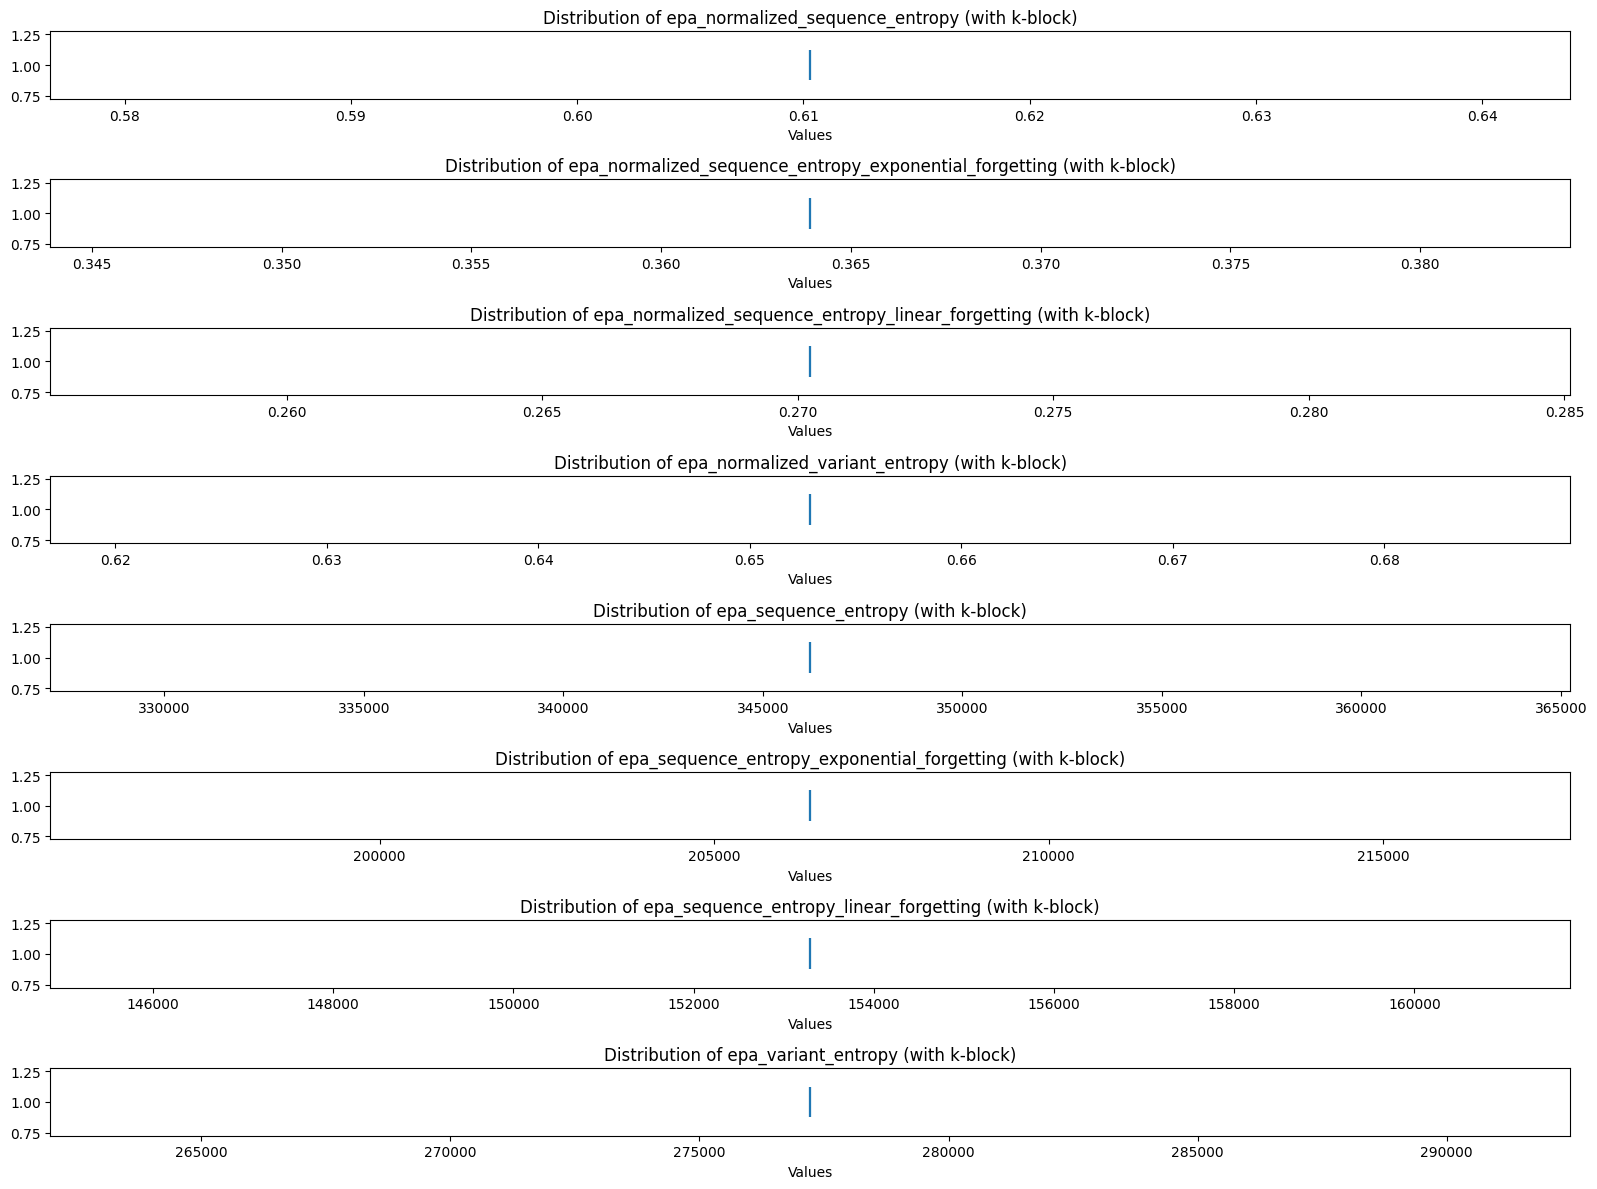

In [24]:
import matplotlib.pyplot as plt

# Your existing code...
unique_keys = epa_results['Key'].unique()
unique_keys = unique_keys[(unique_keys != 'n_traces') & (unique_keys != 'n_unique_traces')]

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=len(unique_keys), ncols=1, figsize=(16, 1.5 * len(unique_keys)))

# Iterate over unique keys
for i, key in enumerate(unique_keys):
    # Plot each category's distribution on its own subplot for entropy results
    axes[i].violinplot(epa_results[epa_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i].set_title("Distribution of " + key + " (with k-block)")
    axes[i].set_xlabel('Values')  # Set x-label for the first subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Scatterplot of entropies wrt to unique traces

KeyError: 'n_unique_traces'

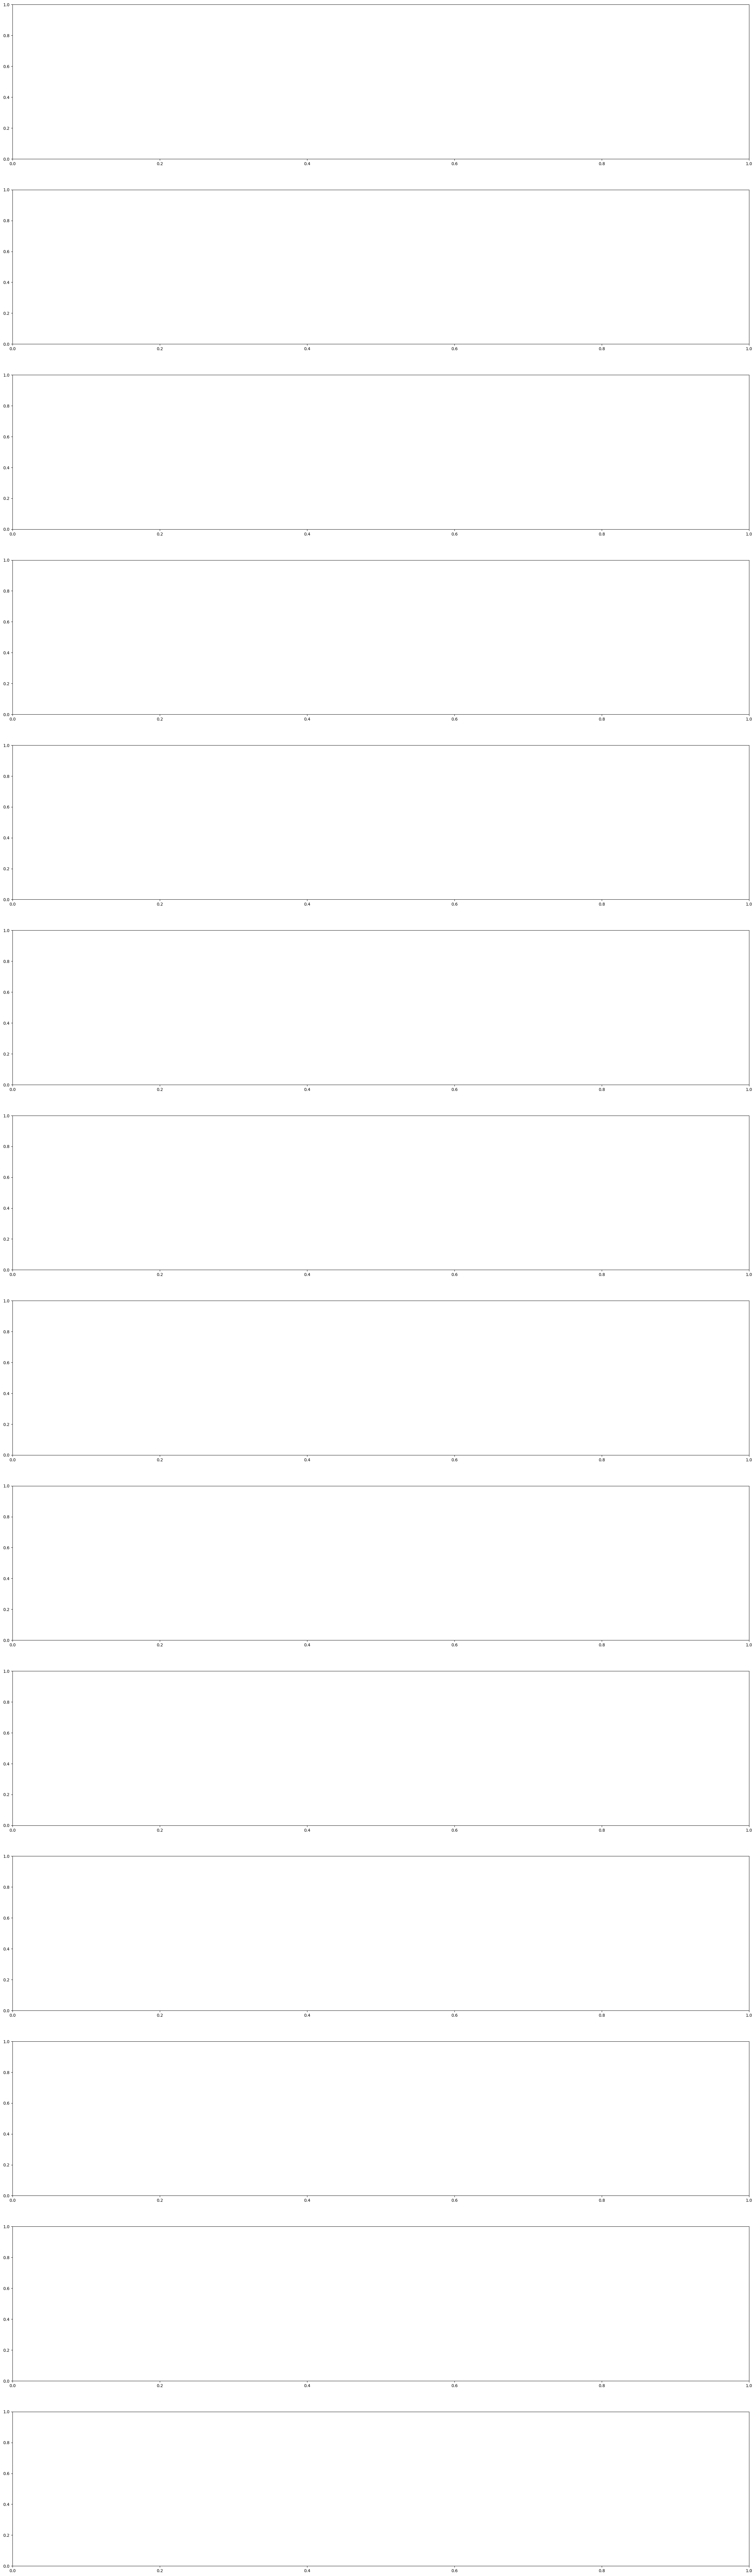

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

keys_needed = ['eventropy_global_block',
               'eventropy_k_block_diff_1', 'eventropy_k_block_diff_3',
               'eventropy_k_block_diff_5', 'eventropy_k_block_ratio_1',
               'eventropy_k_block_ratio_3', 'eventropy_k_block_ratio_5',
               'eventropy_knn_3', 'eventropy_knn_5', 'eventropy_knn_7',
               'eventropy_lempel_ziv', 
               'eventropy_prefix', 'eventropy_trace', 'n_unique_traces']

fig, axis = plt.subplots(len(keys_needed), 1, figsize=(32, 8*(len(keys_needed))))



for i, name in enumerate(keys_needed):
    
    # for entropy results
    filtered_data = epa_results[(epa_results['Key'].isin(keys_needed))]
    # Pivot the DataFrame to have 'n_unique_traces' and 'eventropy_trace' as columns
    pivot_data = filtered_data.pivot(index='File', columns='Key', values='Value')
    # Create a scatterplot
    axis[i].scatter(pivot_data['n_unique_traces'], pivot_data[name])

    # Add labels for each point with smaller font size
    texts = [axis[i].text(x, y, file_name, ha='right', fontsize=8) for x, y, file_name in
             zip(pivot_data['n_unique_traces'], pivot_data[name], pivot_data.index)]

    # Adjust the text labels to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'),ax=axis[i])

    # Add labels and title with smaller font size
    axis[i].set_xlabel('n_unique_traces', fontsize=10)
    axis[i].set_ylabel(name, fontsize=10)
    axis[i].set_title(f'Scatterplot of n_unique_traces vs {name} with File Labels (with k-block)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Entropy valus for different files

better understanding plot

C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2993442393.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2993442393.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2993442393.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2993442393.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

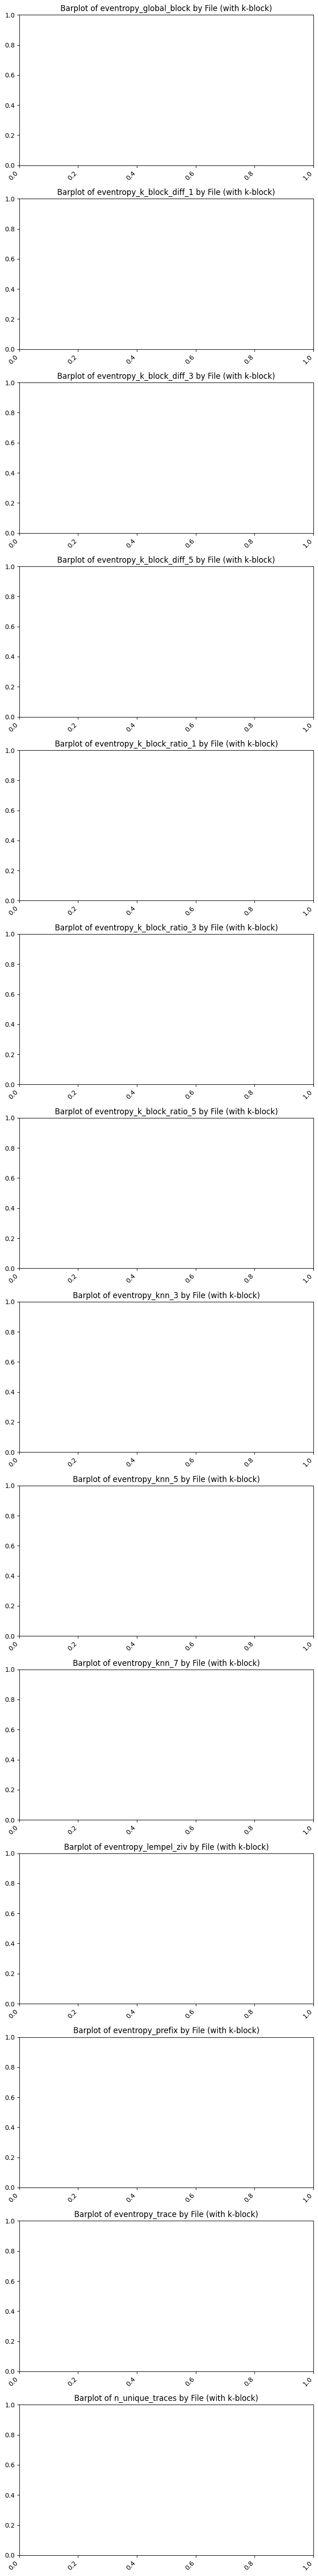

In [29]:
import seaborn as sns

fig, axis = plt.subplots(len(keys_needed), 1, figsize=(7, 4*(len(keys_needed))))

for i, name in enumerate(keys_needed):
    #for entropy features
    temp_df = epa_results[epa_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='File')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i])

    # Rotate x-axis labels to make them horizontal
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
    axis[i].set_title(f'Barplot of {name} by File (with k-block)')

plt.tight_layout()
plt.show()


better looking plot

C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2944558032.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2944558032.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2944558032.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_8724\2944558032.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

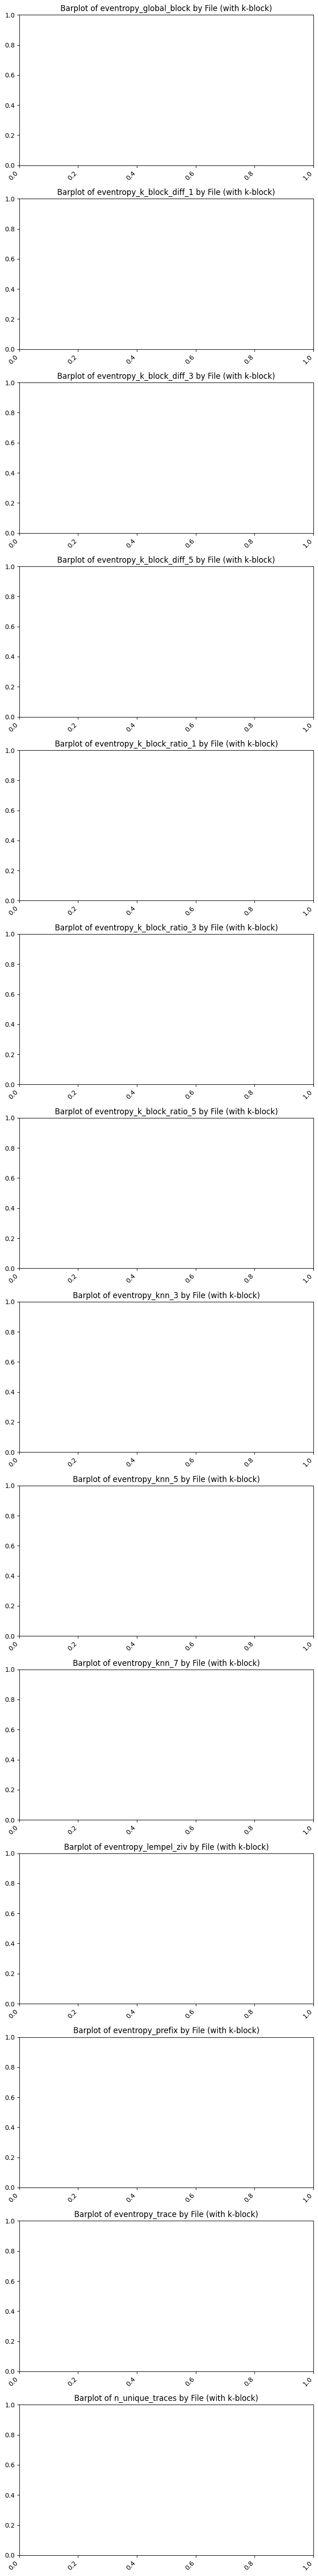

In [30]:
import seaborn as sns

fig, axis = plt.subplots(len(keys_needed), 1, figsize=(7, 4*(len(keys_needed))))

for i, name in enumerate(keys_needed):
    #for entropy features
    temp_df = epa_results[epa_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='Value')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i])

    # Rotate x-axis labels to make them horizontal
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha='right')
    axis[i].set_title(f'Barplot of {name} by File (with k-block)')
    
plt.tight_layout()
plt.show()
